Este notebook contém alguns dos dados atualizados do capítulo 10 do Blanchard. O código foi baseado em https://macroeconomics.github.io/Economic Data Analysis.html#.XmA5yXWYXP8

# Importando pacotes

In [1]:
%config InlineBackend.figure_format='retina'

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime as dt

pd.set_option("display.max_columns", 20)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

sns.set_context("talk")

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
start = dt(1960, 1, 1)
end = dt(2020, 1, 1)

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
ocde = [
    'AUS', # Australia
    'AUT', # Austria
    'BEL', # Belgium
    'CAN', # Canada
    'CHE', # Switzerland
    'DEU', # Germany
    'DNK', # Denmark
    'ESP', # Spain
    'FIN', # Finland
    'FRA', # France
    'GBR', # Great Britain
    'GRC', # Greece
    'IRL', # Ireland
    'ISL', # Iceland
    'ITA', # Italy
    'JPN', # Japan
    'KOR', # South Korea
    'LUX', # Luxemburg
    'MEX', # Mexico
    'NLD', # Netherlands
    'NOR', # Norway
    'NZL', # New Zealand,
    'PRT', # Portugal
    'SWE', # Sweden
    'TUR', # Turkey
    'USA', # United States
]

asia = [
    'IRN', 'CHN', 'IND', 'HKG', 'VNM', 'IRQ', 'JPN', 'SGP', 'ISR', 'KOR', 'PAK', 'THA',
    'PHL', 'MDV', 'PRK', 'BGD', 'SYR', 'SAU', 'LBN', 'LKA', 'IDN', 'QAT', 'MYS', 'MMR',
    'OWN', 'TWN', 'AFG', 'ARE', 'NPL', 'KHM', 'YEM', 'ARM', 'MAC', 'JOR', 'KWT', 'UZB',
    'BHR', 'MNG', 'BHU', 'BTN', 'PSE', 'LAO', 'KGZ', 'BRN', 'TKM', 'TJK', 'CXR', 'TLS',
]

asia = [i for i in asia if i not in ocde]


africa = [
    'DZA', 'MAR', 'LBY', 'MUS', 'ZAF', 'CPV', 'TUN', 'ETH', 'NGA', 'SYC', 'MDG', 'KEN',
    'COD', 'SDN', 'MLI', 'GHA', 'TZA', 'SOM', 'SEN', 'CIV', 'UGA', 'ZWE', 'BFA', 'CMR',
    'AGO', 'RWA', 'REU', 'ERI', 'GMB', 'NER', 'NAM', 'MOZ', 'SWZ', 'TCD', 'MRT', 'GAB',
    'GIN', 'DJI', 'BWA', 'LBR', 'BEN', 'ZMB', 'SLE', 'MWI', 'TGO', 'BDI', 'LSO', 'SSD',
    'COG', 'COM', 'GNQ'
]

afria = [i for i in africa if i not in ocde]

# Funções

In [3]:
def crise_subprime(axes, alpha=0.4):
    axes.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='gray', 
    label='Crise subprime',
    zorder=0,
    alpha=alpha
)

In [4]:
def crises(axes, color='lightgray', alpha=0.4):
    axes.axvspan(xmin = "1953-07", xmax='1954-04', color = color, alpha=alpha, label = 'Recessão')
    axes.axvspan(xmin = "1957-08", xmax='1958-05', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1960-05", xmax='1961-02', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1969-12", xmax='1970-11', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1973-11", xmax='1975-03', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1980-01", xmax='1980-07', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1981-07", xmax='1982-01', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1990-07", xmax='1991-03', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "2001-03", xmax='2001-11', color = color, alpha=alpha, label = '')

In [5]:
def PersistencePlot(
    dfin, 
    var0='y1960', 
    var1='y2010', 
    labelvar='countrycode', 
    dx=0.006125, dy=0.006125, 
    ):
    '''
    Plot the association between var0 and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    df = dfin.copy()
    df = df.dropna(subset=[var0, var1]).reset_index(drop=True)

    xlabel=f'Log[Renda per capita {var0[1:]}] em relação aos EUA'
    ylabel=f'Log[Renda per capita {var1[1:]}] em relação aos EUA' 
    linelabel=f'{var0[1:]}-{var1[1:]}'
    filename=f'{var0[1:]}_versus_{var1[1:]}_drop.pdf'


    # Plot
    k = 0
    fig, ax = plt.subplots()
    ax.plot([df[var0].min()*.99, df[var0].max()*1.01], [df[var0].min()*.99, df[var0].max()*1.01], c='r', label='45 degree')
    sns.regplot(x=var0, y=var1, data=df, ax=ax, label=linelabel)
    movex = df[var0].mean() * dx
    movey = df[var1].mean() * dy
    for line in range(0,df.shape[0]):
        ax.text(df[var0][line]+movex, df[var1][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=12, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')

# Importando dados

## Figura 10.1

In [6]:
df = web.DataReader(
    [
        'GDPC1', # home mortgages and consumer credit; liability, Level 
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'PIB',
]

df.index.name = ''
df = df.dropna()
df.head()

,PIB
,
1960-01-01,3275.757
1960-04-01,3258.088
1960-07-01,3274.029
1960-10-01,3232.009
1961-01-01,3253.826


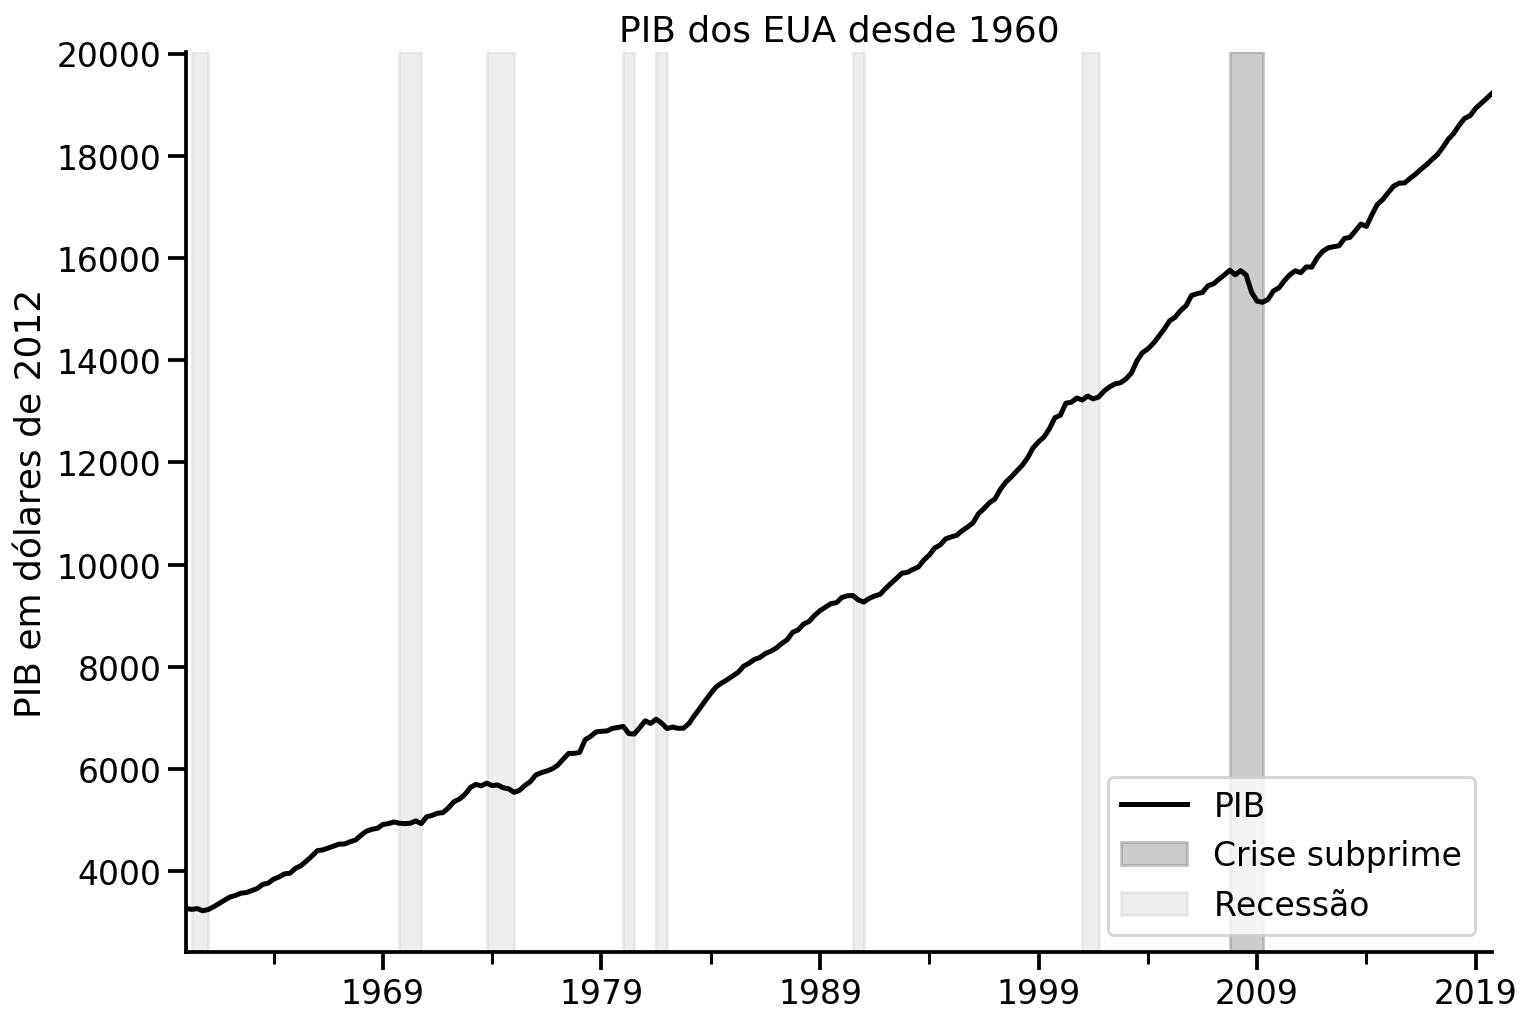

In [7]:
fig, ax = plt.subplots(figsize=(11.7,8.27))

df.plot(
    ax=ax,
    linewidth=2.5,
    color=('black')
)

crise_subprime(ax)
crises(ax)
ax.legend()
sns.despine()
ax.set_title('PIB dos EUA desde 1960')
ax.set_ylabel('PIB em dólares de 2012')
plt.savefig(pathgraphs + 'figura_10.1.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Penn World Table

In [8]:
base = pd.read_stata('https://www.rug.nl/ggdc/docs/pwt91.dta') # Baixando dados

df = base.copy()
df['rgdpe_pc'] = df['rgdpe']/df['pop'] # Calculando PIB per capita
df['lrgdpe_pc'] = df['rgdpe_pc'].apply(lambda x: np.log(x)) # Calculando em termos de log

df.describe() # Describe the data

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,rgdpe_pc,lrgdpe_pc
count,12376.000000,9.985000e+03,9.985000e+03,9985.000000,8841.000000,3373.000000,8299.000000,9.985000e+03,9.985000e+03,9.985000e+03,...,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9985.000000,9959.000000,7047.000000,9985.000000,9985.000000
mean,1983.500000,2.720569e+05,2.691928e+05,30.736767,14.799485,1984.099854,2.064241,1.984998e+05,2.686580e+05,2.697088e+05,...,0.019670,0.391839,0.486303,0.368860,0.436420,0.431026,0.466652,1.403137,11740.474609,8.665622
std,19.628579,1.078882e+06,1.070178e+06,114.569824,59.107712,272.879944,0.720774,7.772703e+05,1.079234e+06,1.070720e+06,...,0.201448,0.280254,0.956450,0.347244,0.211918,0.220563,0.400624,2.628997,16880.246094,1.208302
min,1950.000000,1.846645e+01,1.977999e+01,0.004376,0.001180,1353.886841,1.007038,1.443100e+01,1.986141e+01,1.848834e+01,...,-8.731015,0.017207,0.012448,0.010474,0.007868,0.022644,0.019666,0.060732,223.094574,5.407596
25%,1966.750000,6.178189e+03,6.380658e+03,1.634517,0.940000,1799.336060,1.431531,5.227761e+03,6.395296e+03,6.002223e+03,...,-0.022347,0.182697,0.198099,0.125520,0.243906,0.248910,0.219715,0.663940,2263.862305,7.724828
50%,1983.500000,2.725946e+04,2.710632e+04,6.115370,3.021000,1972.072876,1.954407,2.153850e+04,2.763264e+04,2.677256e+04,...,0.000727,0.326817,0.396347,0.256664,0.473103,0.486665,0.364834,0.982678,5683.105469,8.645253
75%,2000.250000,1.386558e+05,1.374726e+05,19.891548,8.583438,2149.860352,2.649120,1.005379e+05,1.357644e+05,1.362898e+05,...,0.044098,0.520135,0.594202,0.490205,0.596405,0.576243,0.569292,1.458653,14765.556641,9.600052
max,2017.000000,1.839607e+07,1.838384e+07,1409.517456,792.575317,2910.734863,3.974208,1.483615e+07,1.846078e+07,1.792857e+07,...,9.917986,3.986815,35.654171,2.367351,2.271417,5.465247,6.730951,60.361191,255408.937500,12.450621


# Plotando

## Convergência Pós-1960?

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/gpetrini/.local/lib/python3.6/site-packages/seaborn/distributions.py:323: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  ax.plot(x, y, color=color, label=label, **kwargs)
/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/gpetri

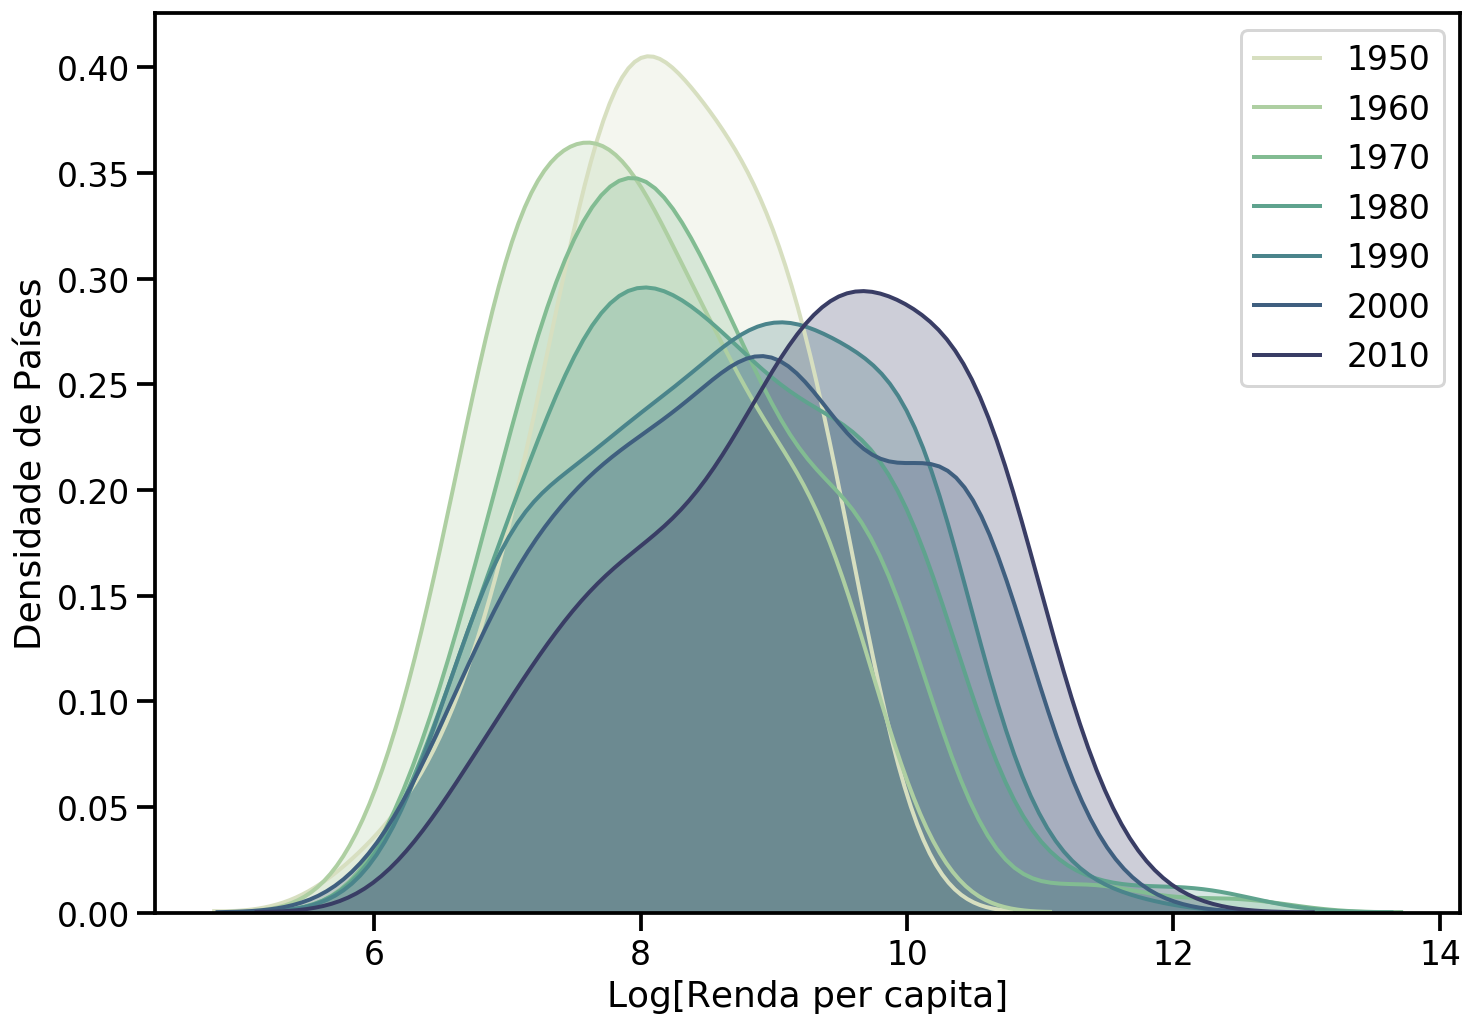

In [9]:
period = list(range(1950, 2020, 10)) + [2019]
mycolors = sns.cubehelix_palette(len(period), start=.5, rot=-.75)

fig, ax = plt.subplots(figsize=(11.7,8.27))
k = 0
for t in period:
    sns.kdeplot(df.loc[df.year==t].lrgdpe_pc, ax=ax, shade=True, label=str(t), linewidth=2, c=mycolors[k])
    k += 1
ax.set_xlabel('Log[Renda per capita]')
ax.set_ylabel('Densidade de Países')
plt.savefig(pathgraphs + 'y1950-2010-density.pdf', dpi=300, bbox_inches='tight')

In [10]:
df.set_index('year', inplace=True)
df['lrgdpe_pc_US'] = df.loc[df.countrycode=='USA', 'lrgdpe_pc']
df['lrgdpe_pc_rel'] = df.lrgdpe_pc / df.lrgdpe_pc_US
df.reset_index(inplace=True)
df = df[['countrycode', 'year', 'lrgdpe_pc_rel']].pivot(index='countrycode', columns='year', values='lrgdpe_pc_rel')
df.columns = ['y' + str(col) for col in df.columns]
df.reset_index(inplace=True)

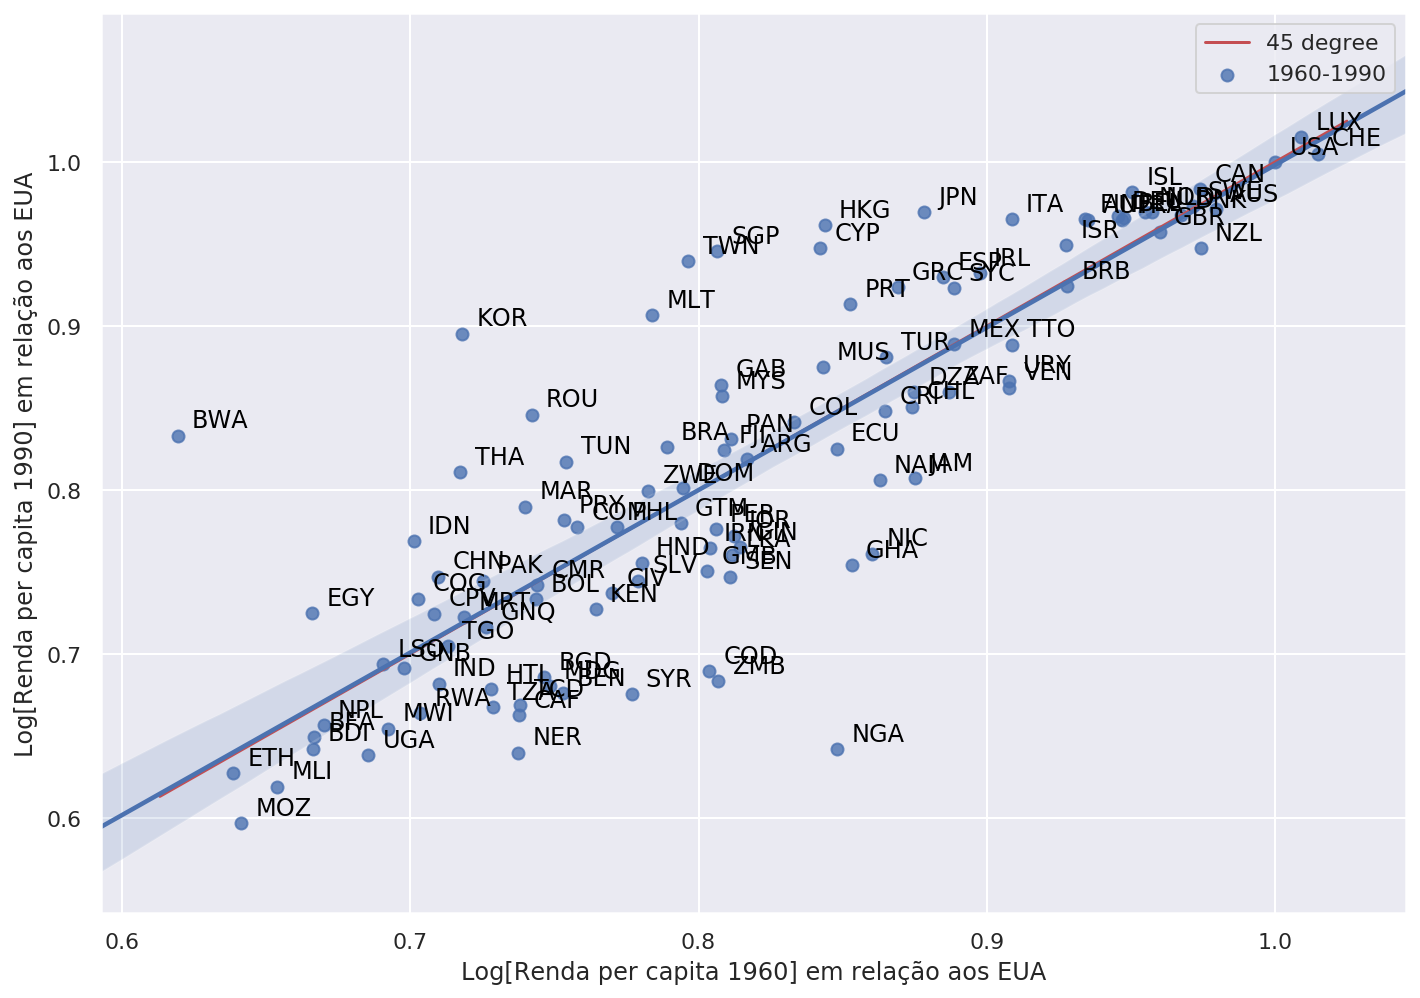

In [11]:
PersistencePlot(dfin=df, var0='y1960', var1='y1990')

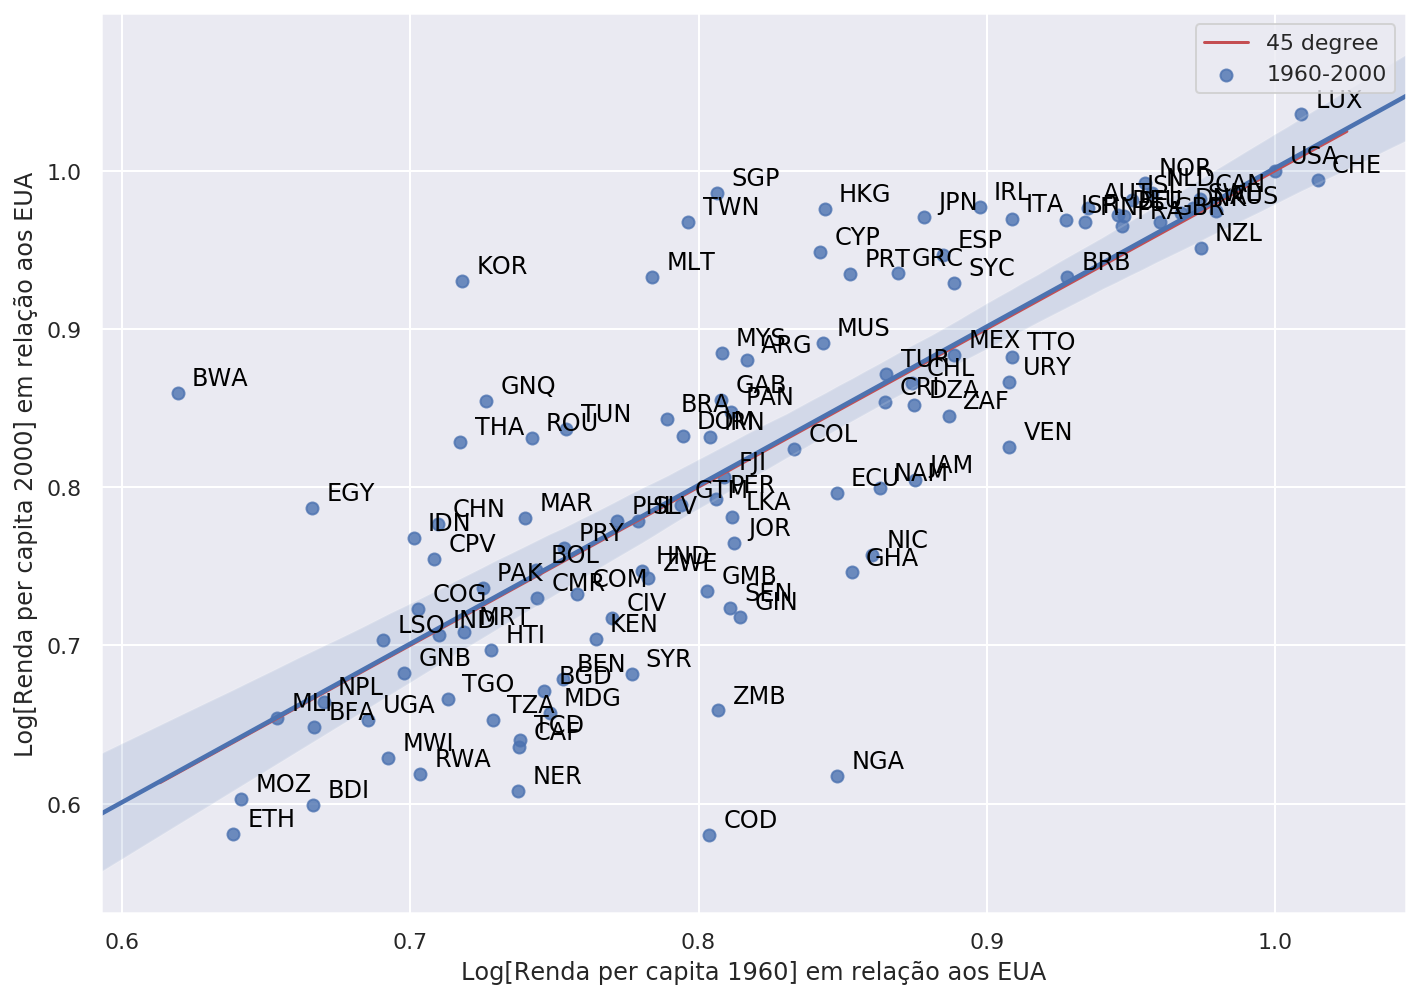

In [12]:
PersistencePlot(dfin=df, var0='y1960', var1='y2000')

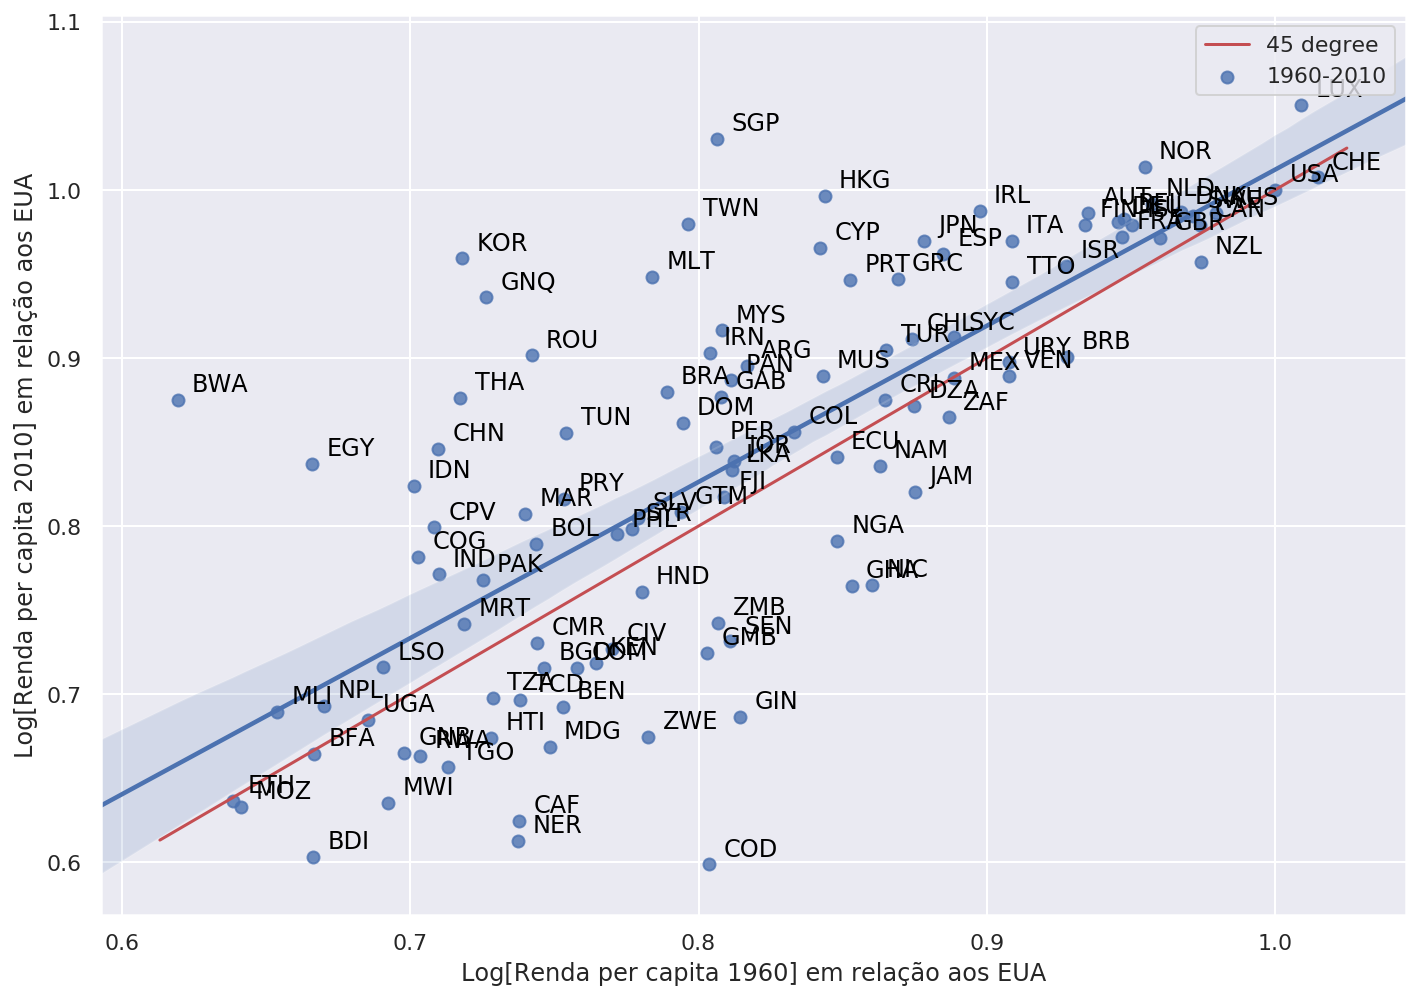

In [13]:
PersistencePlot(dfin=df, var0='y1960', var1='y2010')

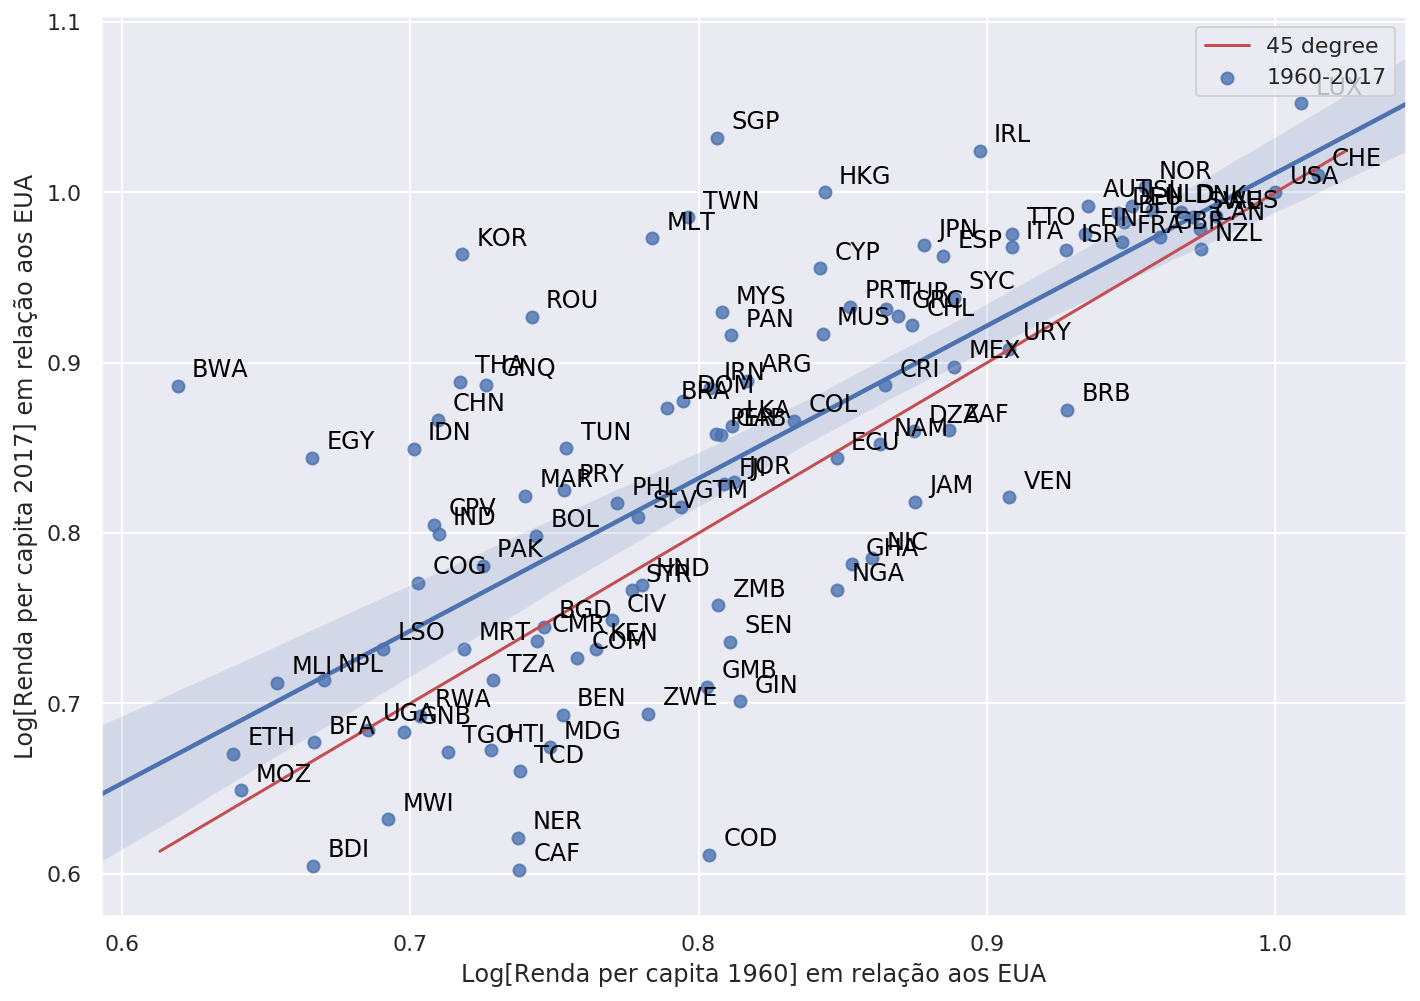

In [14]:
PersistencePlot(dfin=df, var0='y1960', var1='y2017')

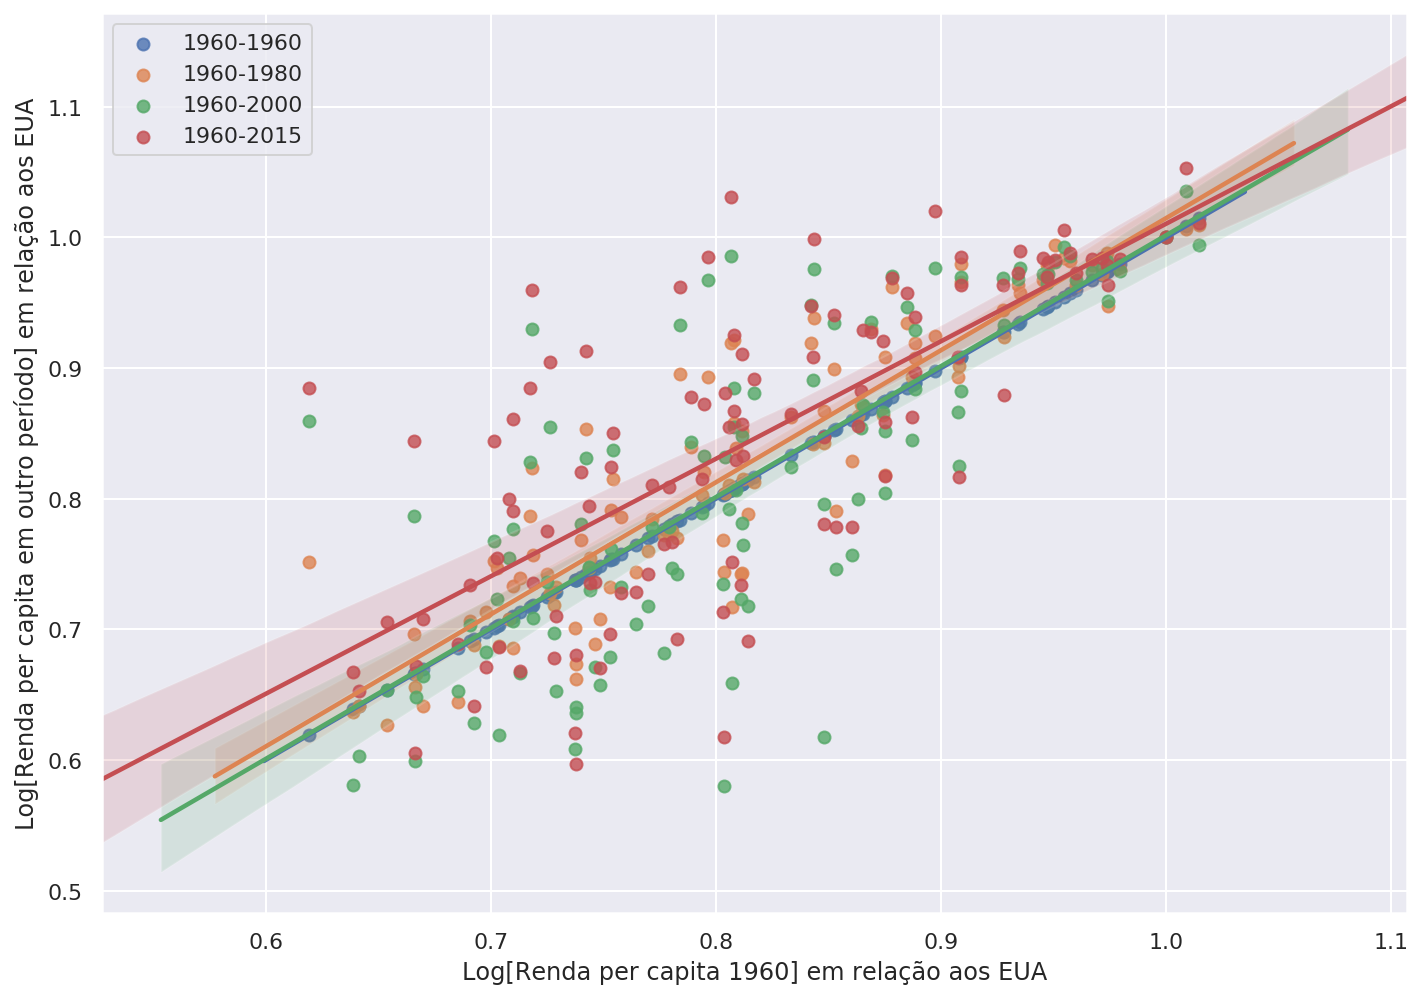

In [15]:
period = list(range(1960, 2020, 20)) + [2015]
mycolors = sns.cubehelix_palette(len(period), start=.5, rot=-.75)

k = 0
fig, ax = plt.subplots(figsize=(11.7,8.27))
for t in period:
    sns.regplot(x='y1960', y='y'+str(t), data=df, ax=ax, label='1960-'+str(t))
    k += 1
ax.set_xlabel('Log[Renda per capita 1960] em relação aos EUA')
ax.set_ylabel('Log[Renda per capita em outro período] em relação aos EUA')
ax.legend()
plt.savefig(pathgraphs + '1960_versus_All_drop.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Figura 10.2

In [16]:
df = base.copy()
df['rgdpe_pc'] = df['rgdpe']/df['pop'] # Calculando PIB per capita
df['lrgdpe_pc'] = df['rgdpe_pc'].apply(lambda x: np.log(x)) # Calculando em termos de log
df = df[['countrycode', 'year', 'rgdpe_pc']].pivot(index='countrycode', columns='year', values='rgdpe_pc')
df.columns = ['y' + str(col) for col in df.columns]
df.reset_index(inplace=True)

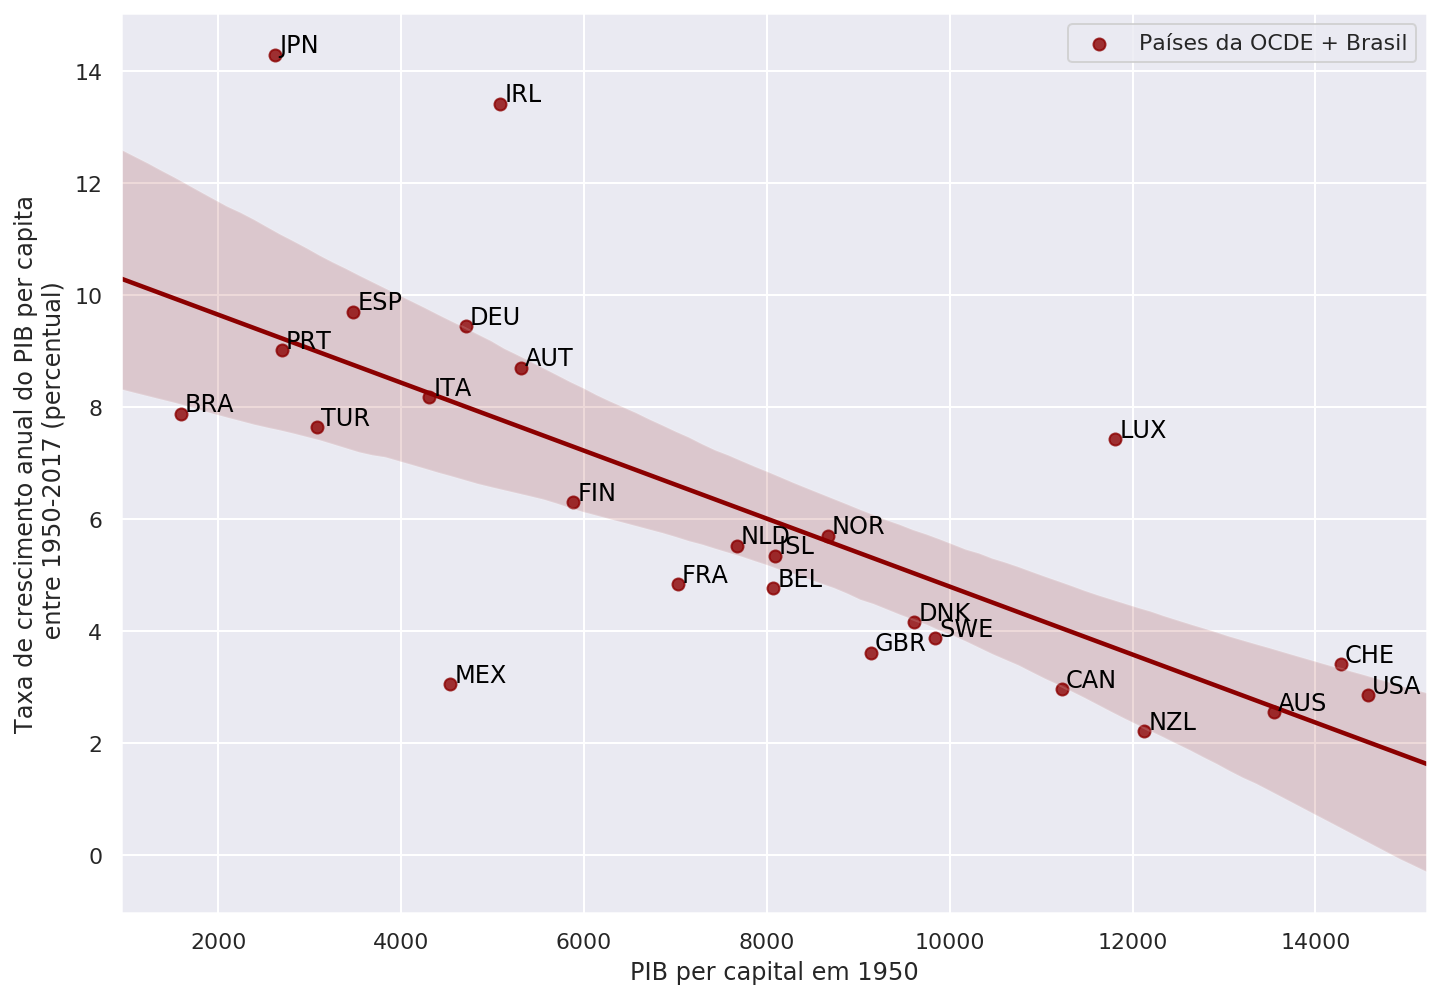

In [17]:
ano_inicial = 'y1950'
ano_final = 'y2017'
paises = ocde + ['BRA']
labelvar='countrycode'
dx=0.006125 
dy=0.006125

df = df[df['countrycode'].isin(paises)].copy()
df['Comparacao'] = (df[ano_final] - df[ano_inicial])/df[ano_inicial]
df = df.dropna()

fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.regplot(x=ano_inicial, y='Comparacao', data=df, ax=ax, label='Países da OCDE + Brasil', color='darkred')

ax.set_xlabel(f'PIB per capital em {ano_inicial[1:]}')
ax.set_ylabel(f'Taxa de crescimento anual do PIB per capita\n entre {ano_inicial[1:]}-{ano_final[1:]} (percentual)')
ax.legend()

movex = df[ano_inicial].mean() * dx
movey = df['Comparacao'].mean() * dy
for line in range(0,df.shape[0]):
    ax.text(
        x=df[ano_inicial].iloc[line]+movex, 
        y=df['Comparacao'].iloc[line]+movey, 
        s=df[labelvar].iloc[line], 
        horizontalalignment='left', fontsize=12, color='black')
plt.savefig(pathgraphs + 'figura_10.2.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Figura 10.3

In [18]:
df = base.copy()
df['rgdpe_pc'] = df['rgdpe']/df['pop'] # Calculando PIB per capita
df['lrgdpe_pc'] = df['rgdpe_pc'].apply(lambda x: np.log(x)) # Calculando em termos de log
df = df[['countrycode', 'year', 'rgdpe_pc']].pivot(index='countrycode', columns='year', values='rgdpe_pc')
df.columns = ['y' + str(col) for col in df.columns]
df.reset_index(inplace=True)

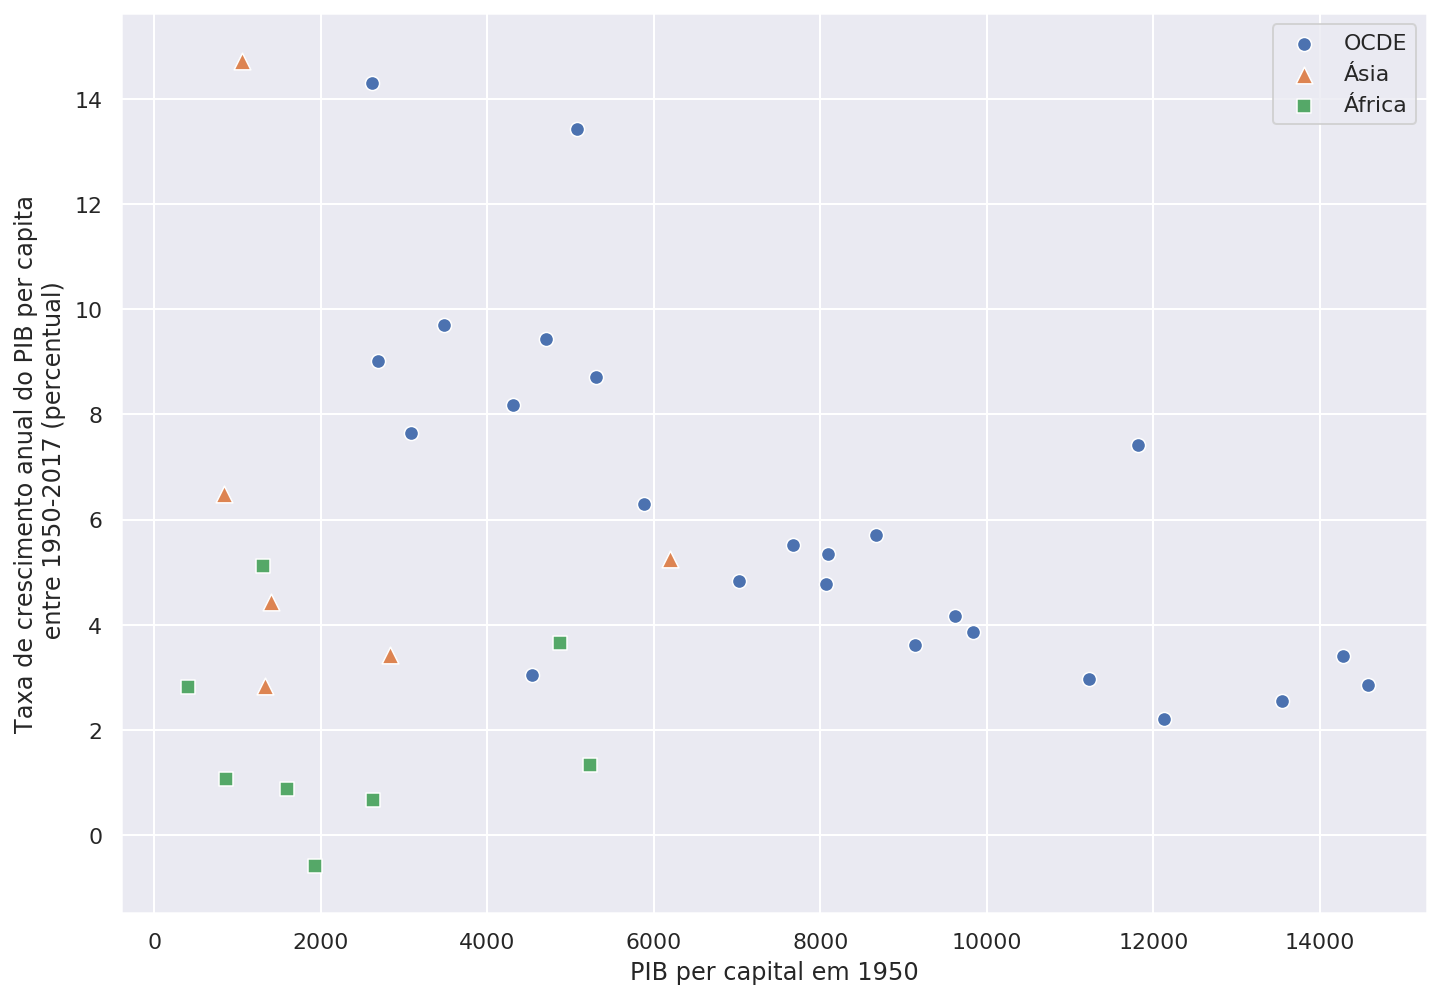

In [19]:
ano_inicial = 'y1950'
ano_final = 'y2017'
fig, ax = plt.subplots(figsize=(11.7,8.27))

df_ocde = df[df['countrycode'].isin(ocde)].copy()
df_ocde['Comparacao'] = (df_ocde[ano_final] - df_ocde[ano_inicial])/df_ocde[ano_inicial]
df_ocde = df_ocde.dropna()
sns.scatterplot(x=ano_inicial, y='Comparacao', data=df_ocde, ax=ax, label='OCDE', 
                markers='D', s=50)



df_asia = df[df['countrycode'].isin(asia)].copy()
df_asia['Comparacao'] = (df_asia[ano_final] - df_asia[ano_inicial])/df_asia[ano_inicial]
df_asia = df_asia.dropna()
sns.scatterplot(x=ano_inicial, y='Comparacao', data=df_asia, ax=ax, label='Ásia', 
                marker='^', s=70)


df_africa = df[df['countrycode'].isin(africa)].copy()
df_africa['Comparacao'] = (df_africa[ano_final] - df_africa[ano_inicial])/df_africa[ano_inicial]
df_africa = df_africa.dropna()
sns.scatterplot(x=ano_inicial, y='Comparacao', data=df_africa, ax=ax, label='África', 
                marker="s", s=50)


ax.set_xlabel(f'PIB per capital em {ano_inicial[1:]}')
ax.set_ylabel(f'Taxa de crescimento anual do PIB per capita\n entre {ano_inicial[1:]}-{ano_final[1:]} (percentual)')
ax.legend()

plt.savefig(pathgraphs + 'figura_10.3.pdf', dpi=300, bbox_inches='tight')
plt.show()